* Convolutional autoencoder를 이용하여 image의 노이즈를 제거

# 준비

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

## helper function

In [2]:
def preprocess(array):
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array

def noise(array):
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=array.shape)
    return np.clip(noisy_array, 0.0, 1.0)

def display(array1, array2):
    # display 10 random images
    
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

## 데이터

(28, 28, 1)


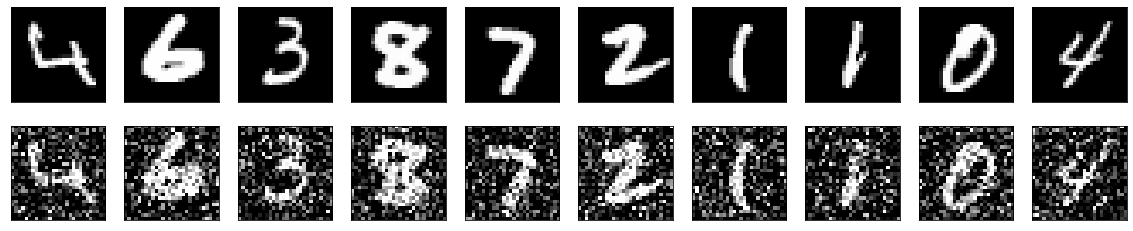

In [4]:
(train_data, _), (test_data, _) = mnist.load_data()

# normalize
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# add_noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# display
print(train_data[0].shape)
display(train_data, noisy_train_data)

# 모델

In [5]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248  

# 훈련
* x = y = train_data

## Train _ clean data

In [6]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50
469/469 [==============================] - 10s 7ms/step - loss: 0.1298 - val_loss: 0.0741
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0725 - val_loss: 0.0703
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0699 - val_loss: 0.0686
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0685 - val_loss: 0.0675
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0676 - val_loss: 0.0667
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0669 - val_loss: 0.0662
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0664 - val_loss: 0.0657
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0660 - val_loss: 0.0654
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0656 - val_loss: 0.0652
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0653 - val_loss: 0.064

## Predict _ clean data

313/313 [==============================] - 1s 1ms/step


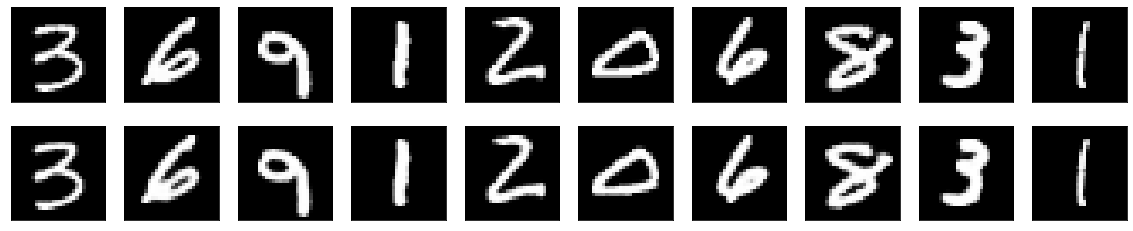

In [7]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

## Train _ Noise data

In [8]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1027 - val_loss: 0.0946
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0940 - val_loss: 0.0921
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0922 - val_loss: 0.0908
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0910 - val_loss: 0.0898
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0901 - val_loss: 0.0891
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0895 - val_loss: 0.0887
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0890 - val_loss: 0.0882
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0886 - val_loss: 0.0879
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0882 - val_loss: 0.0876
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0879 - val_lo

## Prediction _ Noise data

313/313 [==============================] - 1s 2ms/step


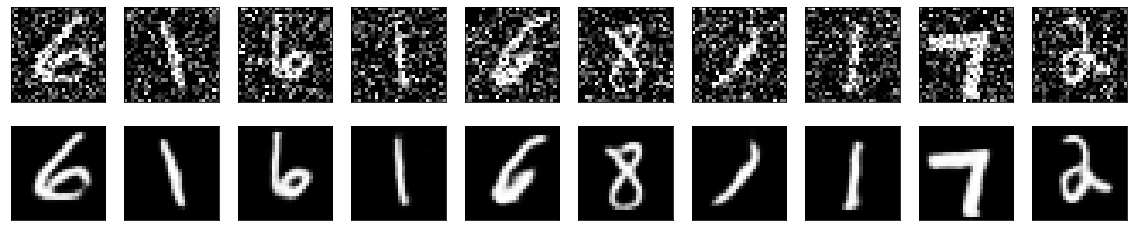

In [10]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)